In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import vaex


In [3]:
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%%time

df_train = vaex.from_csv("./Datasets/train.csv", convert = True, chunk_size = 3_000_000)

Wall time: 69.7 ms


In [5]:
df_train.tail()

_93    feature_94    feature_95    feature_96    feature_97    feature_98    feature_99    feature_100    feature_101    feature_102    feature_103    feature_104    feature_105    feature_106    feature_107    feature_108    feature_109    feature_110    feature_111    feature_112    feature_113    feature_114    feature_115    feature_116    feature_117    feature_118    feature_119    feature_120    feature_121    feature_122    feature_123    feature_124    feature_125    feature_126    feature_127    feature_128    feature_129        ts_id
  0     499  2.96727    0.000297515   0.000297515  -0.0053925    -0.0124719    -0.00668118            -1    -0.779554    -0.597258     0.674234     0.735692   -0.153732     -0.165179   -0.175335    -0.193784     -0.80156      -0.393694     -0.320222     -0.526467     -0.256197    -0.0952112    -0.375613      -0.276567     -0.263636     -0.459801     -0.835249     -1.31091      -0.738298     -0.515071     -0.824567     -1.35551      -1.0343       -1.5067       0.396471     0.700967      1.02496        1.6815        0.77983       1.54871        0.724329     0.950487      1.29476       1.59344       -0.29056      -0.352783      1.58592       3.17322      0.619381       2.57133      -0.447906    -0.0507792    -0.950054      -0.412035     -0.391826     -0.214283    -0.0313076     -1.3178        0.828586     -1.88739       0.17049      -1.83406      0.854159      0.817421     -0.853525      -1.30954     -0.0833318      7.33023       6.72445       1.09421       1.13689        5.85262     -0.741456     -0.54119        5.3963        5.30213     1.15856       -1.19043       1.47952     -0.297432       1.98495       0.613163      1.2298       1.91715       -0.69929     -0.0492646      0.394207      0.169451      0.387889     0.371892     -0.0373025     0.695588       2.73229      0.865081       1.66678       2.339        2.32333      -1.0647         0.410544     -0.617541    -0.520164    -0.0461385      -0.358046      0.883252     -1.33886       0.72251      -0.117011      -1.19401       2.10718        -1.2946         -0.94019      -0.714361      -0.994101       -1.78169     -0.368766        1.17335       1.3268          0.697012      0.430603       0.919654       2.66775        -1.17723       -1.24065       -1.17286        -1.86336      -1.63219      -0.276465       0.0538022      -3.45325        1.17319       -1.2155         0.170404      -3.43333        0.496345      -2.22475        1.20785       -1.26498   2.39048e+06
  1     499  0          8.29566e-05   8.29566e-05  -0.000720444  -0.000197987   0.000428237            1    -2.33681     -2.0381      -1.81715     -2.93978    -1.29833      -2.1527      0.59582      1.44392      -2.14644      -1.15561       0.843802      2.83756       0.825944     1.94311      -1.30443       -1.47838       0.886965      2.25879       0.237587      0.723364      1.87801       2.43674       1.36972       3.43348       0.240261      0.702011    -0.101345    -0.380001     -0.584876      -1.48103      -0.223231     -0.909103      -0.435538    -0.927647     -0.832525     -1.49088        0.442008      0.909086     -1.77213      -4.83491      2.91622       -2.05908      -2.01933     -0.358054      0.223748       1.06217       0.326424      1.00759      2.09946        4.72218      10.3309        4.00111      -1.88715      -0.298258    -0.212893      0.299529      0.086596       0.962533     1.25735        4.81952       4.45421       1.28579       1.33474        5.88781      1.34039       1.12175        5.17827       5.08881    -1.17089        0.839521     -0.253736    -0.0890005     -0.653078     -1.50583      -2.36125     -0.117645       2.19119     -0.349353      -0.924976     -2.92032      -5.17908     -0.12575       3.09978       0.923428      -1.23821      0.692268       1.25836       0.277557     1.88983       2.18447       -1.51561       1.80738      2.06236      0.576443        3.33076       1.07266       0.676294      2.17068       2.77572        0.272255      1.

In [6]:
temp = pd.DataFrame(data = df_train.date.values, columns=['date'])
temp['resp'] = df_train.resp.values.cumsum()
temp['resp1'] = df_train.resp_1.values.cumsum()
temp['resp2'] = df_train.resp_2.values.cumsum()
temp['resp3'] = df_train.resp_3.values.cumsum()
temp['resp4'] = df_train.resp_4.values.cumsum()
temp.head()

date      resp     resp1     resp2     resp3     resp4
0     0  0.006270  0.009916  0.014079  0.008773  0.001390
1     0 -0.003521  0.007088  0.010852  0.001454 -0.009724
2     0  0.020449  0.032222  0.038460  0.034859  0.024656
3     0  0.017249  0.027491  0.035187  0.034398  0.024180
4     0  0.014645  0.028744  0.037352  0.033183  0.017961

In [7]:

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title ("Cumulative resp over time 1, 2, 3, and 4 (500 days)", fontsize=18)
temp.resp.plot()
temp.resp1.plot()
temp.resp2.plot()
temp.resp3.plot()
temp.resp4.plot()
plt.legend(loc = 'upper left')
del temp
gc.collect()


208

In [14]:
def get_columns():
    string = 'feature_{}'
    res = []
    for i in range(0,129):
        res.append(string.format(i))
    return res  
feature = df_train[get_columns()]
feature

nan                  1.206257846656194    nan                  1.1180074632254562   1.1502925919387823   0.1183809472132949   nan                  4.136078822934655    nan                  2.0662452937187634   3.6102101020485193   -2.139066570256902   nan                  2.330484345590356   nan                  0.1820663559476802  1.0884511523850284   -3.527751823149786   nan                  -1.3388586541183414  nan                  -1.2577736375645256  -1.194012899339835   -1.7190617893298377  nan                  -0.9401896976505948  nan                  -1.5102236521137329  -1.7816925484470931  -3.373968713394613   nan                  2.5130736876429927   nan                 0.4249636664243363   1.9928870452947764   -2.616856114480536   nan                  0.5615284013593087   nan                  -0.9940405266068194  0.0995604909953231   -2.48599336253856    nan                  nan                  2.838853329968024    0.4992507969267983  3.0337315607444664   1.513488229626491    4.397532397643308    1.2660371716027687   3.856383635155797
4          1            -3.172026325951204   -3.0931822488347764  -0.1615175689966253  -0.1281492120322189  -0.1950059780970714  -0.1437804585814702  nan                  nan                  2.6830175344842297   1.450991104500586    nan                  nan                  1.2577608636004298   0.6323362856297121   0.90520443732969     0.5752749980417653   nan                  nan                  2.5508834180853697   2.4840819137302868   nan                  nan                  2.5028284340282507   2.606440314270821    2.7312511199178147   2.566560672425206    nan                  nan                  -1.477905141551199   -1.7224506368608772  nan                  nan                  -1.1919811234132685  -1.0376293017742526  -2.2372747408762788  -1.7404558956626766  0.3269038738408242   0.2218094868822039   -0.1875856250640425  -0.2729067452650333  0.8708391654079926   -1.2563696819609222  1.246881379023162    -0.0712394604653603  2.0859735994394475   -0.8647855903293622  -1.7949592895126592  -1.706292326769448   -1.5039725728179394  -0.9035218053886124  -1.4938784921206631  -0.9168968223368176  -2.874815494719888   -2.45202999765161    nan                  0.545998866093703    -1.5721604752702998  -1.265388315089132   -0.4020676458445146  -1.1852946247073346  -0.9864763671524308  -1.794339717112228   -1.9955457538007884  -4.252365607889485  -1.7930075142230515  -1.1819554671599453  -2.116960129102576   -2.0305015965379183  -2.810802667007766   -3.4679927416864125  -2.050142430757756   nan                  0.4105091527303441   nan                  0.2525362901735472   0.4206845130715729   0.170508859473748      nan                  1.621498761598681    nan                  1.6977246866556672   1.6896623246558882   0.016256918779943    nan                  0.4642975714620447   nan                  -0.0324220891852462  0.18759457867075     -2.7886024902536706  nan                  4.34528166786039    nan                  2.7377383545795406  2.6029368358465765   -1.785502476356554   nan                  -0.1725606206563862  nan                  -0.2995161887085597  -0.4200205617653923  -2.3546113540261158  nan                  0.7621922923113079   nan                  1.598620110884969    0.6231315173646725   -1.7425395756258169  nan                  -0.9346745567262724  nan                 -0.3730129566878455  -1.213539596434963   -3.677787410714141   nan                  2.6841194372249317   nan                  2.8618483629902585   2.134804438623996    -1.2792839760109225  nan                  nan                  0.34484980547868     4.1011451906910255  0.6142523517760828   6.623455785719018    0.8001294553400851   5.233242658234733    0.3626359719234483
...        ...          ...                  ...                  ...                  ...                  ...                  ...                  ...                  ...                  ...                  ...             

In [59]:
def get_columns():
    string = 'resp_{}'
    res = ['resp']
    for i in range(1,5):
        res.append(string.format(i))
    return res  
target = df_train[get_columns()]
target

#          resp                 resp_1                   resp_2                   resp_3                  resp_4
0          0.0062703622375184   0.0099159912847074       0.0140785793200363       0.0087730484526562      0.0013903667296804
1          -0.0097916823496845  -0.002828226627981       -0.0032263220711053      -0.0073194857531274     -0.0111140632260971
2          0.0239701262920541   0.0251338605627157       0.0276073937324631       0.0334057215208214      0.0343797377796644
3          -0.0032000979027754  -0.004730139135553       -0.0032728260515913      -0.0004608249864155702  -0.0004762047793803986
4          -0.0026035758680759  0.0012521488963478       0.0021649608845523       -0.0012154871830689     -0.0062186086139852
...        ...                  ...                      ...                      ...                     ...
2,390,486  0.0153958313552097   0.0001415458937198048    0.0001415458937198048    0.0058293821677725      0.0203423312737616
2,390,487  -0.0047175397655089  1.2160713410923332e-05   1.2160713410923344e-05   -0.00093485705187084    -0.0063256002477956
2,390,488  0.016590770094135    0.0004986590158046218    0.0004986590158046218    0.0076049447022015      0.0249071026234334
2,390,489  -0.0020036905445666  -0.00015610816797374824  -0.00015610816797374826  -0.0013748834057909     -0.0037015748236871
2,390,490  -0.0019046214579785  -0.001854936751989       -0.001854936751989       -0.0011940456091327     -0.0008639336964420637

In [60]:
target_w = target

In [61]:
temp_1 = pd.DataFrame(data = target.values, columns=target.get_column_names())
temp_2 = pd.DataFrame(data = df_train['weight'].values, columns=['weight'])
#target['resp_1'] * df_train['weight']
string = 'molt_{}'
string_2 = 'resp_{}'
for i in range(1,4):
    temp_1[string.format(i)] = temp_1[string_2.format(i)] * temp_2['weight']
temp_1['date'] = df_train.date.values
temp_1




resp    resp_1    resp_2    resp_3    resp_4    molt_1    molt_2  \
0        0.006270  0.009916  0.014079  0.008773  0.001390  0.000000  0.000000   
1       -0.009792 -0.002828 -0.003226 -0.007319 -0.011114 -0.047156 -0.053794   
2        0.023970  0.025134  0.027607  0.033406  0.034380  0.000000  0.000000   
3       -0.003200 -0.004730 -0.003273 -0.000461 -0.000476 -0.000000 -0.000000   
4       -0.002604  0.001252  0.002165 -0.001215 -0.006219  0.000173  0.000300   
...           ...       ...       ...       ...       ...       ...       ...   
2390486  0.015396  0.000142  0.000142  0.005829  0.020342  0.000000  0.000000   
2390487 -0.004718  0.000012  0.000012 -0.000935 -0.006326  0.000000  0.000000   
2390488  0.016591  0.000499  0.000499  0.007605  0.024907  0.000000  0.000000   
2390489 -0.002004 -0.000156 -0.000156 -0.001375 -0.003702 -0.000044 -0.000044   
2390490 -0.001905 -0.001855 -0.001855 -0.001194 -0.000864 -0.000000 -0.000000   

           molt_3  date  
0        0.000000     0  
1       -0.122042     0  
2        0.000000     0  
3       -0.000000     0  
4       -0.000168     0  
...           ...   ...  
2390486  0.000000   499  
2390487 -0.000000   499  
2390488  0.000000   499  
2390489 -0.000390   499  
2390490 -0.000000   499  

[2390491 rows x 9 columns]

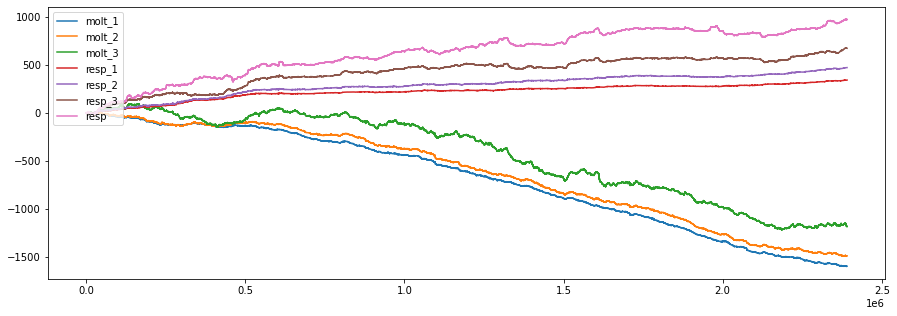

In [62]:
fig, ax = plt.subplots(figsize = (15,5))
string = 'molt_{}'
string_2 = 'resp_{}'
for i in range(1,4):
    temp_1[string.format(i)].cumsum().plot()
for i in range(1,4):
    temp_1[string_2.format(i)].cumsum().plot()
temp_1['resp'].cumsum().plot()

plt.legend(loc = 'upper left')


In [18]:
df_train_temp = df_train.correlation(x = df_train)
df_train_temp.head()

TypeError: correlation() missing 1 required positional argument: 'x'